Train RNNs and deep RNNs for one-step ahead and multiple-step ahead forecasting

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0515 - val_loss: 0.0061
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

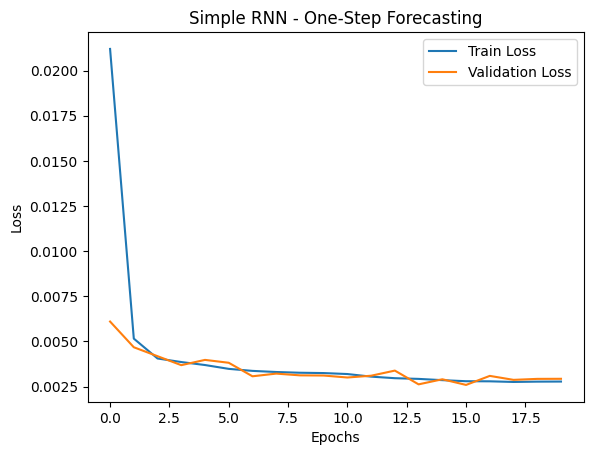

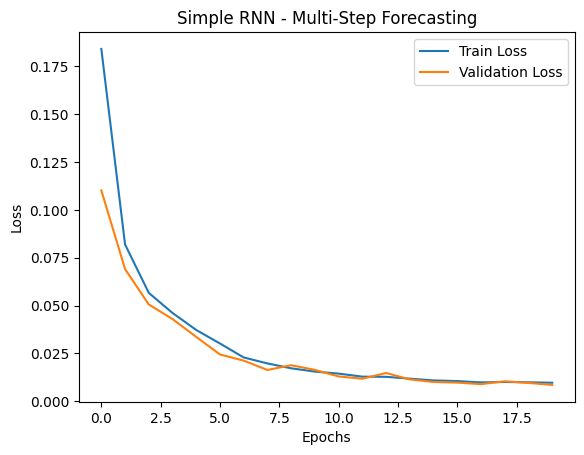

In [7]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Task 1: Create a synthetic time series dataset
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.5 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis]

n_steps = 50
series = generate_time_series(10000, n_steps + 10)

# Split dataset for one-step forecasting
X_train_1, y_train_1 = series[:7000, :n_steps], series[:7000, n_steps]
X_valid_1, y_valid_1 = series[7000:9000, :n_steps], series[7000:9000, n_steps]
X_test_1, y_test_1 = series[9000:, :n_steps], series[9000:, n_steps]

# Split dataset for multi-step forecasting
X_train_multi, y_train_multi = series[:7000, :n_steps], series[:7000, -10:]
X_valid_multi, y_valid_multi = series[7000:9000, :n_steps], series[7000:9000, -10:]
X_test_multi, y_test_multi = series[9000:, :n_steps], series[9000:, -10:]

# Task 1a: Train RNN for one-step forecasting
def create_rnn_one_step_model():
    model = keras.Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        layers.SimpleRNN(20),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

rnn_one_step_model = create_rnn_one_step_model()
history_one_step = rnn_one_step_model.fit(X_train_1, y_train_1, validation_data=(X_valid_1, y_valid_1), epochs=20)

# Task 1b: Train RNN for multi-step forecasting
def create_rnn_multi_step_model():
    model = keras.Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        layers.SimpleRNN(20),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

rnn_multi_step_model = create_rnn_multi_step_model()
history_multi_step = rnn_multi_step_model.fit(X_train_multi, y_train_multi, validation_data=(X_valid_multi, y_valid_multi), epochs=20)

# Plot the training history
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_one_step, "Simple RNN - One-Step Forecasting")
plot_history(history_multi_step, "Simple RNN - Multi-Step Forecasting")


Batch normalization and layer normalization

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.4661 - val_loss: 0.1885
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0965 - val_loss: 0.0775
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0681 - val_loss: 0.0595
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0551 - val_loss: 0.0400
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0481 - val_loss: 0.0316
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0402 - val_loss: 0.0311
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0360 - val_loss: 0.0221
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0305 - val_loss: 0.0203
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0317 - val_loss: 0.0312
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0281 - val_loss: 0.0222
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0255 - val_loss: 0.0211
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━

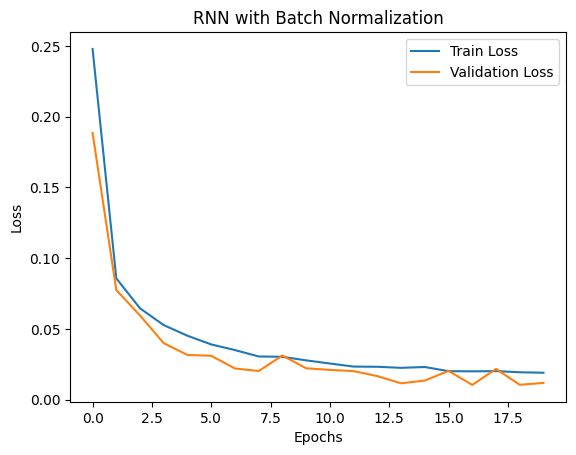

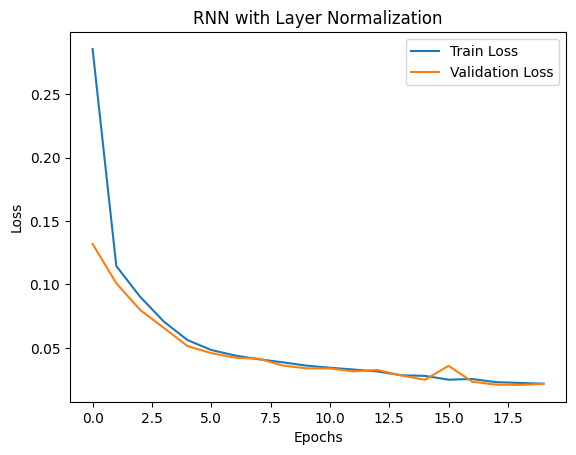

In [8]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Task 2: Apply Batch Normalization and Layer Normalization to deep RNN

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.5 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis]

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:]

# Define RNN model with Batch Normalization
def create_rnn_with_batch_norm():
    model = keras.Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        layers.BatchNormalization(),
        layers.SimpleRNN(20),
        layers.BatchNormalization(),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

rnn_batch_norm = create_rnn_with_batch_norm()
history_batch_norm = rnn_batch_norm.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

# Define RNN model with Layer Normalization
def create_rnn_with_layer_norm():
    class LayerNormRNNCell(layers.SimpleRNNCell):
        def __init__(self, units, **kwargs):
            super().__init__(units, **kwargs)
            self.layer_norm = layers.LayerNormalization()

        def call(self, inputs, states, training=None):
            outputs, new_states = super().call(inputs, states, training=training)
            return self.layer_norm(outputs), new_states

    model = keras.Sequential([
        layers.RNN(LayerNormRNNCell(20), return_sequences=True, input_shape=[None, 1]),
        layers.RNN(LayerNormRNNCell(20)),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

rnn_layer_norm = create_rnn_with_layer_norm()
history_layer_norm = rnn_layer_norm.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

# Plot training histories
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_batch_norm, "RNN with Batch Normalization")
plot_history(history_layer_norm, "RNN with Layer Normalization")


LSTM and GRU

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.2034 - val_loss: 0.1346
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.1167 - val_loss: 0.0834
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.0814 - val_loss: 0.0701
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0690 - val_loss: 0.0626
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0623 - val_loss: 0.0580
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0552 - val_loss: 0.0497
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0479 - val_loss: 0.0414
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0409 - val_loss: 0.0388
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0369 - val_loss: 0.0314
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0329 - val_loss: 0.0319
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0299 - val_loss: 0.0272
Epoch 12/20
219/219 ━━━━━━━━━━━━━━

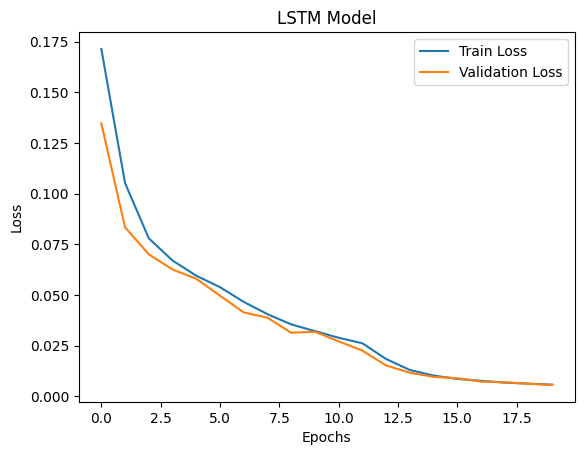

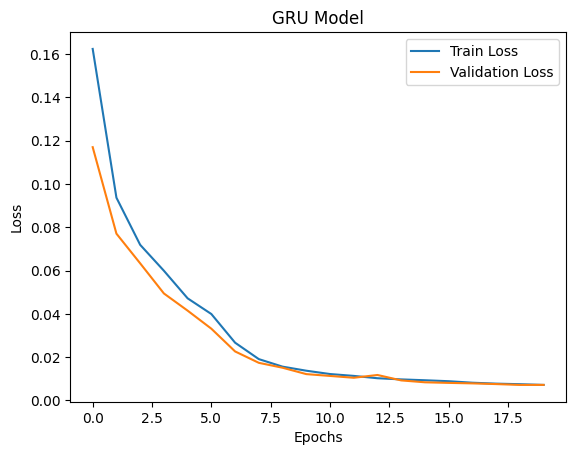

In [3]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Task 3: Train LSTM and GRU networks for time series prediction

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.5 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis]

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:]

# Define LSTM model
def create_lstm_model():
    model = keras.Sequential([
        layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
        layers.LSTM(20),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

lstm_model = create_lstm_model()
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

# Define GRU model
def create_gru_model():
    model = keras.Sequential([
        layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
        layers.GRU(20),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

gru_model = create_gru_model()
history_gru = gru_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

# Plot training histories
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_lstm, "LSTM Model")
plot_history(history_gru, "GRU Model")


Error indicators and plot

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0382 - mae: 0.1346 - mse: 0.0382 - val_loss: 0.0047 - val_mae: 0.0546 - val_mse: 0.0047
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0046 - mae: 0.0542 - mse: 0.0046 - val_loss: 0.0038 - val_mae: 0.0490 - val_mse: 0.0038
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0039 - mae: 0.0496 - mse: 0.0039 - val_loss: 0.0034 - val_mae: 0.0465 - val_mse: 0.0034
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0036 - mae: 0.0485 - mse: 0.0036 - val_loss: 0.0037 - val_mae: 0.0494 - val_mse: 0.0037
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0034 - mae: 0.0470 - mse: 0.0034 - val_loss: 0.0032 - val_mae: 0.0453 - val_mse: 0.0032
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0032 - mae: 0.0459 - mse: 0.0032 - val_loss: 0.0032 - val_mae: 0.0455 - val_mse: 0.0032
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0033 - mae: 0.0463 - mse: 0.00

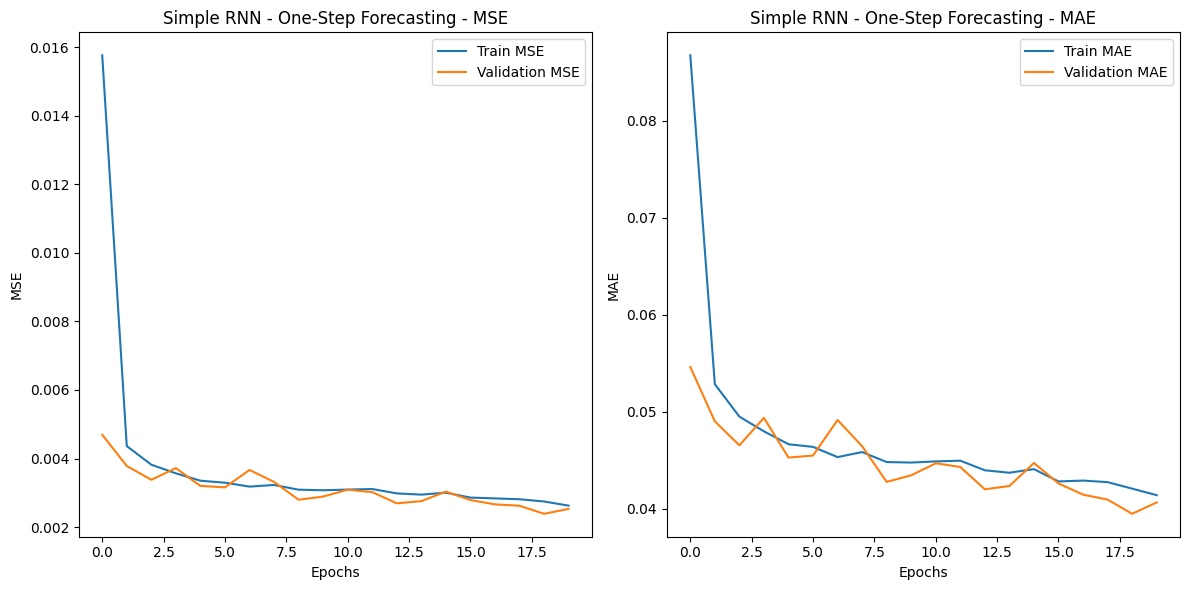

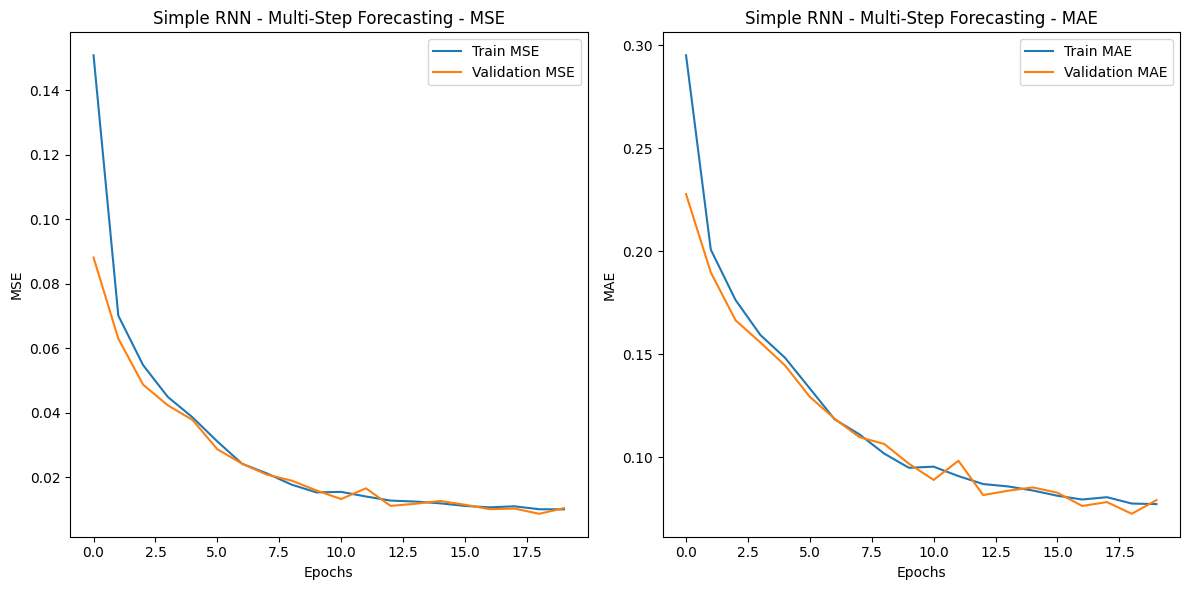

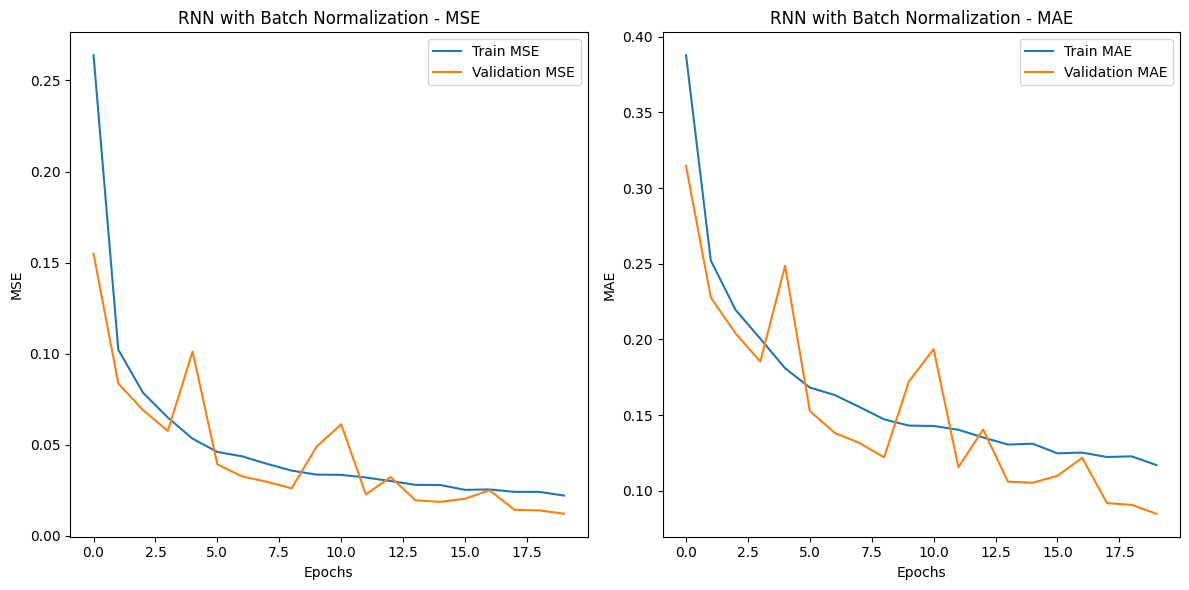

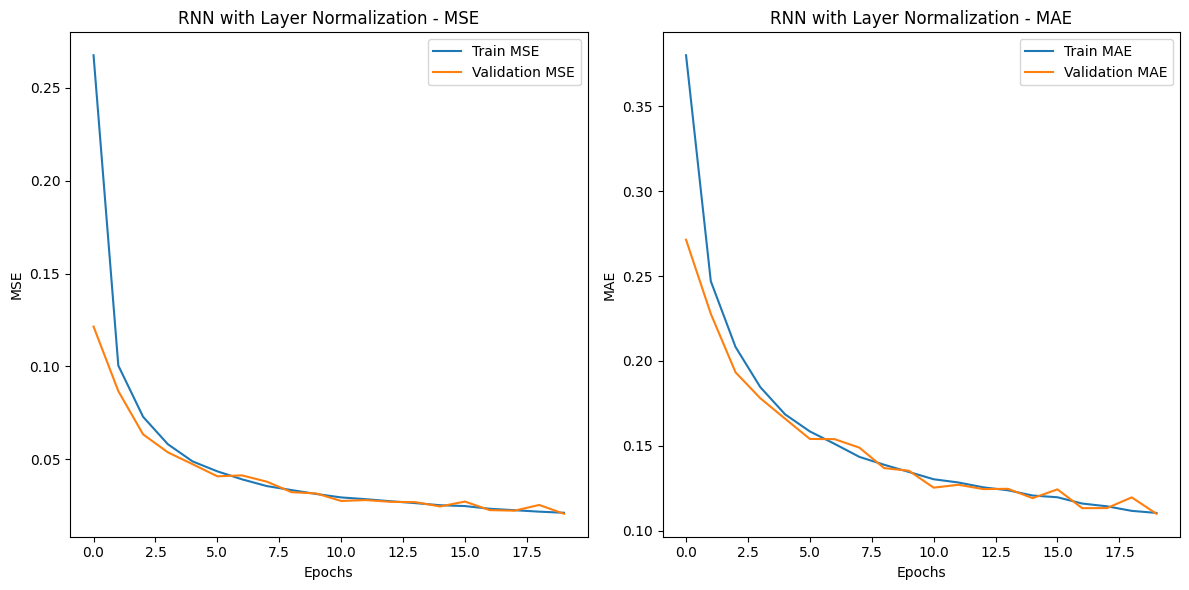

In [4]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Task 1: Create a synthetic time series dataset
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.5 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis]

n_steps = 50
series = generate_time_series(10000, n_steps + 10)

# Split dataset for one-step forecasting
X_train_1, y_train_1 = series[:7000, :n_steps], series[:7000, n_steps]
X_valid_1, y_valid_1 = series[7000:9000, :n_steps], series[7000:9000, n_steps]
X_test_1, y_test_1 = series[9000:, :n_steps], series[9000:, n_steps]

# Split dataset for multi-step forecasting
X_train_multi, y_train_multi = series[:7000, :n_steps], series[:7000, -10:]
X_valid_multi, y_valid_multi = series[7000:9000, :n_steps], series[7000:9000, -10:]
X_test_multi, y_test_multi = series[9000:, :n_steps], series[9000:, -10:]

# Task 1a: Train RNN for one-step forecasting
def create_rnn_one_step_model():
    model = keras.Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        layers.SimpleRNN(20),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse'])
    return model

rnn_one_step_model = create_rnn_one_step_model()
history_one_step = rnn_one_step_model.fit(X_train_1, y_train_1, validation_data=(X_valid_1, y_valid_1), epochs=20)

# Task 1b: Train RNN for multi-step forecasting
def create_rnn_multi_step_model():
    model = keras.Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        layers.SimpleRNN(20),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse'])
    return model

rnn_multi_step_model = create_rnn_multi_step_model()
history_multi_step = rnn_multi_step_model.fit(X_train_multi, y_train_multi, validation_data=(X_valid_multi, y_valid_multi), epochs=20)

# Task 2: Apply Batch Normalization and Layer Normalization to deep RNN

# Define RNN model with Batch Normalization
def create_rnn_with_batch_norm():
    model = keras.Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        layers.BatchNormalization(),
        layers.SimpleRNN(20),
        layers.BatchNormalization(),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse'])
    return model

rnn_batch_norm = create_rnn_with_batch_norm()
history_batch_norm = rnn_batch_norm.fit(X_train_multi, y_train_multi, validation_data=(X_valid_multi, y_valid_multi), epochs=20)

# Define RNN model with Layer Normalization
def create_rnn_with_layer_norm():
    class LayerNormRNNCell(layers.SimpleRNNCell):
        def __init__(self, units, **kwargs):
            super().__init__(units, **kwargs)
            self.layer_norm = layers.LayerNormalization()

        def call(self, inputs, states, training=None):
            outputs, new_states = super().call(inputs, states, training=training)
            return self.layer_norm(outputs), new_states

    model = keras.Sequential([
        layers.RNN(LayerNormRNNCell(20), return_sequences=True, input_shape=[None, 1]),
        layers.RNN(LayerNormRNNCell(20)),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse'])
    return model

rnn_layer_norm = create_rnn_with_layer_norm()
history_layer_norm = rnn_layer_norm.fit(X_train_multi, y_train_multi, validation_data=(X_valid_multi, y_valid_multi), epochs=20)

# Function to plot MSE and MAE over epochs
def plot_metrics(history, title):
    plt.figure(figsize=(12, 6))

    # Plot MSE
    plt.subplot(1, 2, 1)
    plt.plot(history.history['mse'], label='Train MSE')
    plt.plot(history.history['val_mse'], label='Validation MSE')
    plt.title(f'{title} - MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plotting MSE and MAE for each model
plot_metrics(history_one_step, "Simple RNN - One-Step Forecasting")
plot_metrics(history_multi_step, "Simple RNN - Multi-Step Forecasting")
plot_metrics(history_batch_norm, "RNN with Batch Normalization")
plot_metrics(history_layer_norm, "RNN with Layer Normalization")




In [5]:
!git clone https://github.com/ageron/handson-ml2.git

Cloning into 'handson-ml2'...
remote: Enumerating objects: 3100, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3100 (delta 0), reused 1 (delta 0), pack-reused 3096 (from 1)
Receiving objects: 100% (3100/3100), 150.92 MiB | 25.96 MiB/s, done.
Resolving deltas: 100% (1905/1905), done.


In [6]:
!ls handson-ml2/datasets


housing  inception  jsb_chorales  lifesat  titanic


In [7]:
!ls


handson-ml2  sample_data


In [8]:
!ls -l /content/handson-ml2/datasets

total 20
drwxr-xr-x 2 root root 4096 Dec 14 22:49 housing
drwxr-xr-x 2 root root 4096 Dec 14 22:49 inception
drwxr-xr-x 2 root root 4096 Dec 14 22:49 jsb_chorales
drwxr-xr-x 2 root root 4096 Dec 14 22:49 lifesat
drwxr-xr-x 2 root root 4096 Dec 14 22:49 titanic


In [9]:
!ls -la /content/handson-ml2/datasets/jsb_chorales


total 128
drwxr-xr-x 2 root root   4096 Dec 14 22:49 .
drwxr-xr-x 7 root root   4096 Dec 14 22:49 ..
-rw-r--r-- 1 root root 117661 Dec 14 22:49 jsb_chorales.tgz
-rw-r--r-- 1 root root   1975 Dec 14 22:49 README.md


In [10]:
# Path to the .tgz file
tgz_file_path = '/content/handson-ml2/datasets/handson-ml2/datasets/jsb_chorales/jsb_chorales.tgz'


In [11]:
import tarfile # Import the tarfile module

# Path to the .tgz file - Corrected path
tgz_file_path = '/content/handson-ml2/datasets/jsb_chorales/jsb_chorales.tgz'

# Extract the .tgz file
with tarfile.open(tgz_file_path, 'r:gz') as tar:
    tar.extractall(path='/content/jsb_chorales')

In [12]:
import os
import pandas as pd

# Set the data directory (where your chorales are stored)
data_dir = "/content/jsb_chorales"  # Adjust if necessary

# List all files in the 'train' directory
train_files = os.listdir(os.path.join(data_dir, 'train'))

# Load each chorale separately
all_chorales = []

for file in train_files:
    chorale_path = os.path.join(data_dir, 'train', file)
    if chorale_path.endswith(".csv"):
        chorale_data = pd.read_csv(chorale_path, header=0).values  # Skip header row
        all_chorales.append(chorale_data)

# Check the shape and a sample from a few chorales
print(f"Total number of chorales: {len(all_chorales)}")
print(f"Shape of first chorale: {all_chorales[0].shape}")
print(f"Sample chorale (first 5 time steps):\n{all_chorales[0][:5]}")

Total number of chorales: 229
Shape of first chorale: (256, 4)
Sample chorale (first 5 time steps):
[[76 69 60 45]
 [76 69 60 45]
 [76 71 59 45]
 [76 71 59 45]
 [76 72 57 57]]


In [13]:
# Check the length of each chorale
for idx, chorale in enumerate(all_chorales[:5]):  # Check only the first 5 chorales
    print(f"Chorale {idx} length: {len(chorale)}")


Chorale 0 length: 256
Chorale 1 length: 196
Chorale 2 length: 340
Chorale 3 length: 196
Chorale 4 length: 272


In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and Prepare Data

# Set the data directory (where your chorales are stored)
data_dir = "/content/jsb_chorales"  # Adjust if necessary

# List all files in the 'train' directory
train_files = os.listdir(os.path.join(data_dir, 'train'))

# Read all chorales into a list
all_chorales = []

for file in train_files:
    chorale_path = os.path.join(data_dir, 'train', file)
    if chorale_path.endswith(".csv"):
        chorale_data = pd.read_csv(chorale_path, header=0).values  # Skip header row
        all_chorales.append(chorale_data)

# Check chorale shapes
print(f"Total chorales: {len(all_chorales)}")
print(f"Shape of first chorale: {all_chorales[0].shape}")
print(f"Sample chorale (first 5 time steps):\n{all_chorales[0][:5]}")

# Step 2: Generate Sequences

sequence_length = 30  # Length of the sequence for training

X = []
y = []

# Loop through each chorale and generate sequences
for chorale in all_chorales:
    if len(chorale) > sequence_length:  # Ensure chorale is long enough
        for i in range(len(chorale) - sequence_length):
            X.append(chorale[i:i+sequence_length])  # Sequence of 30 time steps
            y.append(chorale[i+sequence_length, 0])  # The next note (target) (only one note)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Verify the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Step 3: Preprocess Data (One-Hot Encoding for Output)

# Since the output (y) is categorical, we'll apply one-hot encoding for the labels
# Reshape y to be a 2D array for one-hot encoding (if needed)
y_encoded = to_categorical(y, num_classes=88)  # 88 possible notes on a piano

print(f"Shape of encoded y: {y_encoded.shape}")

# Step 4: Build the Model

# Define the model
model = Sequential()

# Add LSTM layer: output_dim defines the number of units in the LSTM cell
model.add(LSTM(128, input_shape=(sequence_length, 4), return_sequences=False))  # LSTM layer

# Optionally, you can add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Dense layer: predicts 88 notes (one time step)
model.add(Dense(88, activation='softmax'))  # Output layer (88 possible notes on piano)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check architecture
model.summary()

# Step 5: Train the Model

# Train the model
model.fit(X, y_encoded, epochs=50, batch_size=64, validation_split=0.1)

# Step 6: Generate Music (Next Note Prediction)

# Start with a random sequence from the training set
initial_sequence = X[np.random.randint(0, len(X))]

# Convert to a 3D array for input (one sequence)
current_sequence = initial_sequence.reshape(1, sequence_length, 4)

# Generate the next 50 notes
generated_music = initial_sequence.tolist()  # Start with the initial sequence as a list

for _ in range(50):
    current_sequence = np.array(generated_music[-sequence_length:]).reshape(1, sequence_length, 4)  # Get the last 30 time steps
    next_note_prob = model.predict(current_sequence)  # Predict next note
    next_note = np.argmax(next_note_prob, axis=1)  # Get the index of the most probable note

    # Create a new time step (4 notes per step)
    new_time_step = np.zeros((1, 4))  # Create a placeholder for the new time step (4 notes per step)

    # Set the predicted note index to 1
    # next_note will be an index between 0 and 87, which corresponds to a specific note
    note_index = next_note[0]  # This is the index of the predicted note

    # Convert the predicted note index to a 1-hot encoded vector in the 4-dimensional space
    new_time_step[0, note_index % 4] = 1  # This maps to one of the 4 possible notes in that time step

    # Append the new time step (the next note)
    generated_music.append(new_time_step.tolist()[0])

# Convert generated music to a numpy array
generated_music = np.array(generated_music)

# Output generated music shape
print(f"Generated music shape: {generated_music.shape}")



Total chorales: 229
Shape of first chorale: (256, 4)
Sample chorale (first 5 time steps):
[[76 69 60 45]
 [76 69 60 45]
 [76 71 59 45]
 [76 71 59 45]
 [76 72 57 57]]
Shape of X: (48358, 30, 4)
Shape of y: (48358,)
Shape of encoded y: (48358, 88)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 88)                  │          11,352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,448 (310.34 KB)

 Trainable params: 79,448 (310.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.1678 - loss: 2.7160 - val_accuracy: 0.2579 - val_loss: 2.0492
Epoch 2/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.3100 - loss: 1.9659 - val_accuracy: 0.4196 - val_loss: 1.8011
Epoch 3/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3727 - loss: 1.8091 - val_accuracy: 0.4415 - val_loss: 1.7267
Epoch 4/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.4109 - loss: 1.7279 - val_accuracy: 0.3557 - val_loss: 1.8034
Epoch 5/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.4175 - loss: 1.7018 - val_accuracy: 0.2696 - val_loss: 1.8453
Epoch 6/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.4438 - loss: 1.6437 - val_accuracy: 0.3809 - val_loss: 1.7438
Epoch 7/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.4582 - loss: 1.6097 - val_accuracy: 0.3637 - val_loss: 1.7385
Epoch 8/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.4602 - loss: 1.5919 - 